<h2 align="center">Exploratory Data Analysis of stock prices</h2>
<h1 align="right">Hemant Sharma</h1>



In [4]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [5]:
from pandas_datareader import data

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

%matplotlib inline
color= sns.color_palette()

In [6]:
from datetime import datetime

In [7]:
start = datetime(2006, 1, 1)
end= datetime(2016, 1, 1)
print('Start date\t',start,'\nEnd date\t', end)

Start date	 2006-01-01 00:00:00 
End date	 2016-01-01 00:00:00


In [8]:
GS= data.DataReader("GS", 'yahoo', start, end) #-----Goldman Saches
MS= data.DataReader("MS", 'yahoo', start, end) #-----Morgan Stanley
BAC= data.DataReader("BAC", 'yahoo', start, end) #---Bank of America
C= data.DataReader("C", 'yahoo', start, end) #-------CityGroup
JPM=data.DataReader("JPM", 'yahoo', start, end) #----JP Morgan Chase
WFC= data.DataReader("WFC", 'yahoo', start, end) #---Wells Fargo

In [9]:
print("Gold Man Saches\n\n",GS.head(4))
print("\n\n\nMorgan Stanley\n\n",MS.head(4))
print("\n\n\nBank of America\n\n",BAC.head(4))
print("\n\n\nCitygroup\n\n",C.head(4))
print("\n\n\nJP Morgan Chase\n\n",JPM.head(4))
print("\n\n\nWells Fargo\n\n",WFC.head(4))

Gold Man Saches

                   High         Low        Open       Close     Volume  \
Date                                                                    
2006-01-03  129.440002  124.230003  126.699997  128.869995  6188700.0   
2006-01-04  128.910004  126.379997  127.349998  127.089996  4861600.0   
2006-01-05  127.320000  125.610001  126.000000  127.040001  3717400.0   
2006-01-06  129.250000  127.290001  127.290001  128.839996  4319600.0   

             Adj Close  
Date                    
2006-01-03  104.919411  
2006-01-04  103.470238  
2006-01-05  103.429543  
2006-01-06  104.894989  



Morgan Stanley

                  High        Low       Open      Close     Volume  Adj Close
Date                                                                        
2006-01-03  58.490002  56.740002  57.169998  58.310001  5377000.0  36.631054
2006-01-04  59.279999  58.349998  58.700001  58.349998  7977800.0  36.656166
2006-01-05  58.590000  58.020000  58.549999  58.509998  5778000.0

### 1. Create a list of the ticker symbols (as strings) in alphabetical order. Call this list : tickers

In [10]:
tickers= sorted(['GS','MS','BAC','C','JPM','WFC'])
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

### 2. Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on


In [11]:
stocks= pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [12]:
stocks.head()

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.280807   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  33.916729   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  33.960411   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  33.909451   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  33.931290   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.631054  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.656166  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  36.756695  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  36.794384  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.183868  31.825001  31.555000  31.674999   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.613142  
2006-01-04  31.530001  10870000.0  20.374050  
2006-01-05  31.495001  10158000.0  20.351437  
2006-01-06  31.680000   8403800.0  20.470978  
2006-01-09  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

### 3. Set the column name levels

In [13]:
stocks.columns.names=['Tickers', 'Stock prices']

### 4. Check the head of the bank_stocks dataframe

In [14]:
stocks.head()

Tickers             BAC                                               \
Stock prices       High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Tickers                           C                                      ...  \
Stock prices  Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    34.280807  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    33.916729  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    33.960411  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    33.909451  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    33.931290  487.399994  483.000000  486.000000  483.899994  ...   

Tickers              MS                                         WFC  \
Stock prices       Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  36.631054  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  36.656166  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  36.756695  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  36.794384  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.183868  31.825001   

Tickers                                                               
Stock prices        Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.613142  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.374050  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.351437  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.470978  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.467749  

[5 rows x 36 columns]

### 5. EDA:
 ### a. What is the max Close price for each bank's stock throughout the time period?

In [15]:
stocks.xs(key='Close', level='Stock prices', axis = 1, drop_level=True).max()

Tickers
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

### b. Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by: 
![](pic1.png)
[r_t = (p_t - p_(t-1))/(p_(t-1)) = (p_t)/(p_(t-1)) - 1]

In [16]:
returns= pd.DataFrame()

### c. Use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.



In [17]:
for tickers in tickers:
    returns[tickers+"'s return"]= (stocks[tickers]['Close'].pct_change())*100
    #pct_change() computes %change between the current and a prior element.

In [18]:
returns.head(10)

,BAC's return,C's return,GS's return,JPM's return,MS's return,WFC's return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-1.062022,-1.846218,-1.381236,-1.418263,0.068594,-1.159871
2006-01-05,0.128805,0.496078,-0.039339,0.302884,0.274207,-0.111005
2006-01-06,-0.150085,0.000000,1.416873,0.704577,0.102549,0.587393
2006-01-09,0.064417,-0.473060,1.203045,1.624182,1.058561,-0.015786
2006-01-10,-0.836909,0.309981,1.257765,0.147532,0.050689,-0.078925
2006-01-11,-0.238045,0.906468,-0.045442,-0.073653,0.591014,0.521330
2006-01-12,-0.650758,0.102082,0.212169,-1.842752,-0.167867,-1.162976
2006-01-13,0.000000,-0.224347,0.763701,-0.075100,-0.151337,0.572429


In [19]:
list1=returns.max()

In [20]:
list1.max()

86.98346912026305

In [21]:
returns.dropna().head(5)

,BAC's return,C's return,GS's return,JPM's return,MS's return,WFC's return
Date,,,,,,
2006-01-04,-1.062022,-1.846218,-1.381236,-1.418263,0.068594,-1.159871
2006-01-05,0.128805,0.496078,-0.039339,0.302884,0.274207,-0.111005
2006-01-06,-0.150085,0.000000,1.416873,0.704577,0.102549,0.587393
2006-01-09,0.064417,-0.473060,1.203045,1.624182,1.058561,-0.015786
2006-01-10,-0.836909,0.309981,1.257765,0.147532,0.050689,-0.078925


### d. Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?

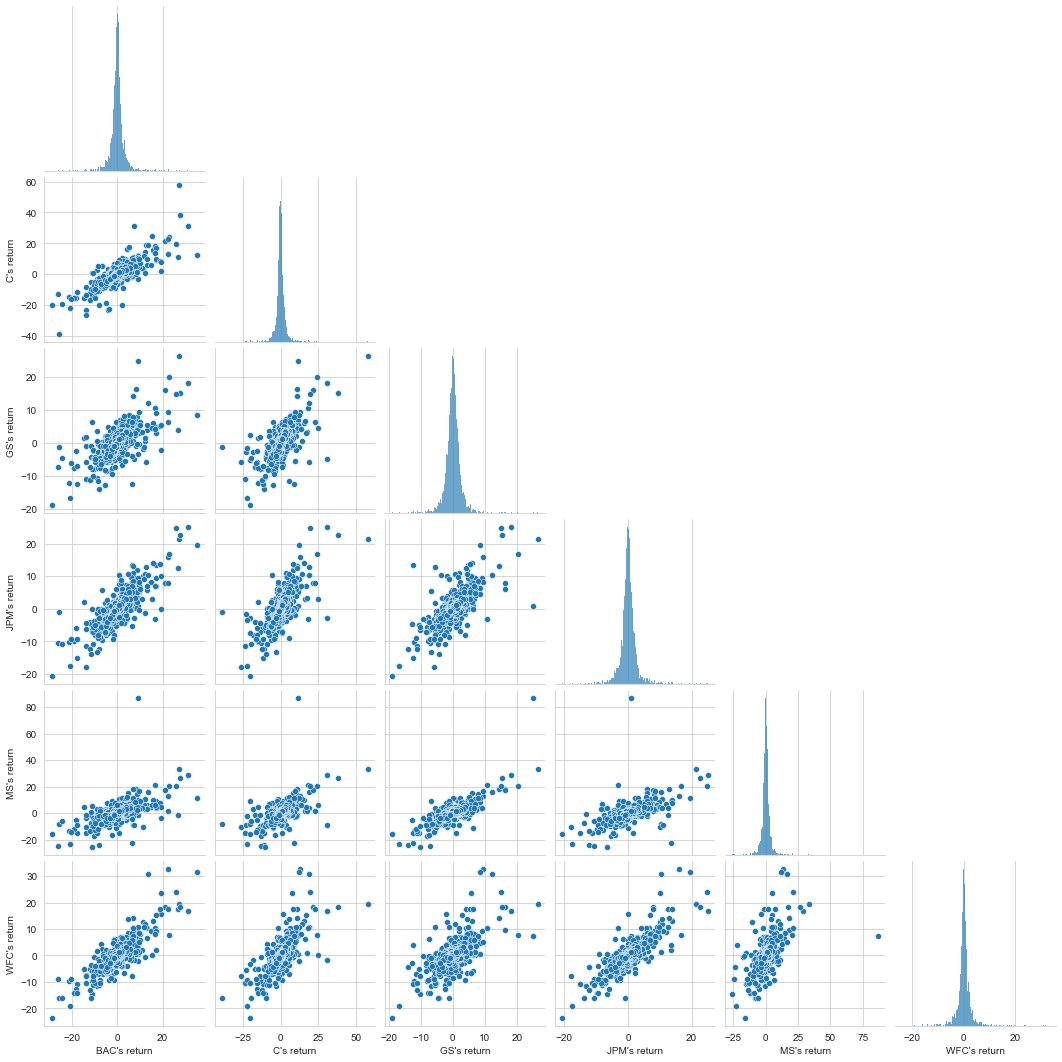

In [22]:
sns.pairplot(returns, corner= True)

### e. Checkout more about the behaviour of Citigroup

<AxesSubplot:xlabel='Date'>

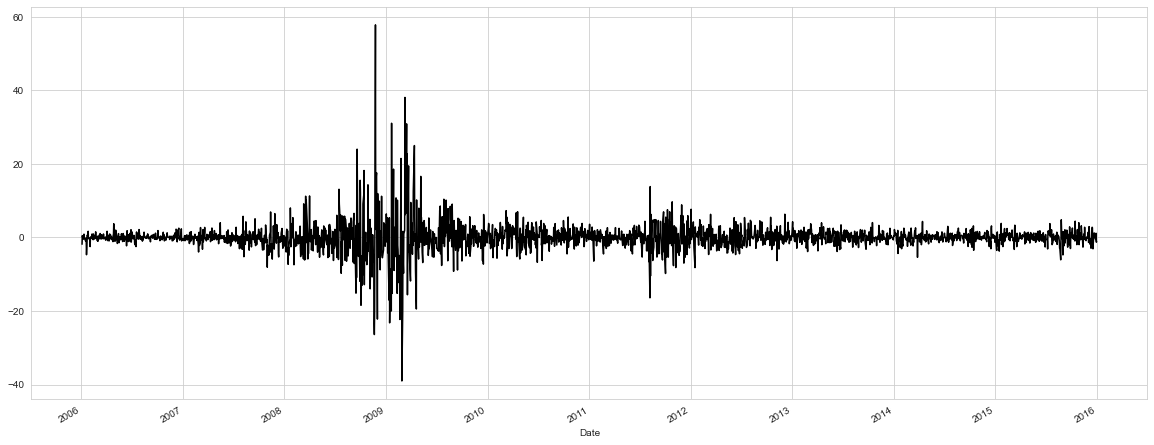

In [23]:
returns["C's return"].plot(color="Black",figsize=(20,8))

<AxesSubplot:xlabel='Date'>

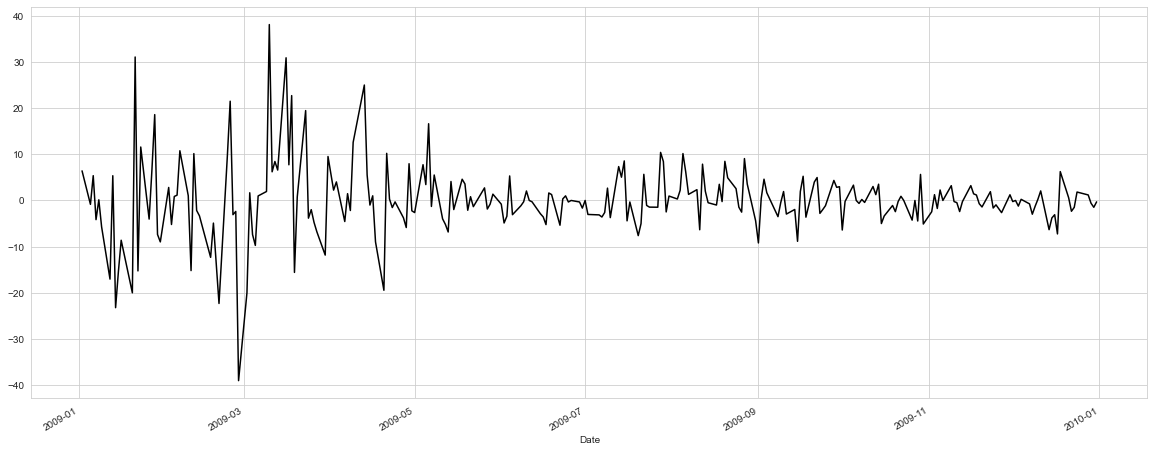

In [24]:
temp=returns['2009-01-01':'2009-12-31']
temp["C's return"].plot(color="Black",figsize=(20,8))

<AxesSubplot:xlabel='Date'>

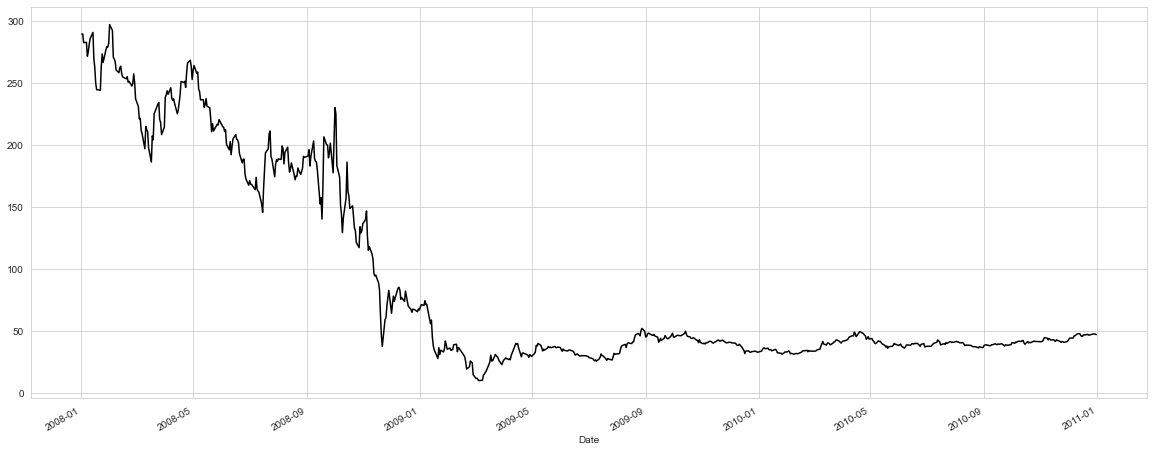

In [39]:
temp=stocks['2008-01-01':'2010-12-31']
temp["C"]["Close"].plot(color="Black",figsize=(20,8))

In [41]:
stocks["C"]["Close"].idxmin(axis=0)

Timestamp('2009-03-05 00:00:00')

### F. Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?

In [25]:
# the date of max return% of these banks
returns.idxmax(axis=0)

BAC's return   2009-04-09
C's return     2008-11-24
GS's return    2008-11-24
JPM's return   2009-01-21
MS's return    2008-10-13
WFC's return   2008-07-16
dtype: datetime64[ns]

In [26]:
# the date of min return% of these banks
returns.idxmin(axis=0)

BAC's return   2009-01-20
C's return     2009-02-27
GS's return    2009-01-20
JPM's return   2009-01-20
MS's return    2008-10-09
WFC's return   2009-01-20
dtype: datetime64[ns]

On 20th Jan, 2009 banks sink stocks on Inauguration Day of Barack Obama.
- Bank of America saw its shares dive by 29%. JP Morgan dropped 21%, Citigroup lost 20%, Wells Fargo slid by 24% and Goldman Sachs fell 19%.

### g. You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame?


<AxesSubplot:xlabel='Date'>

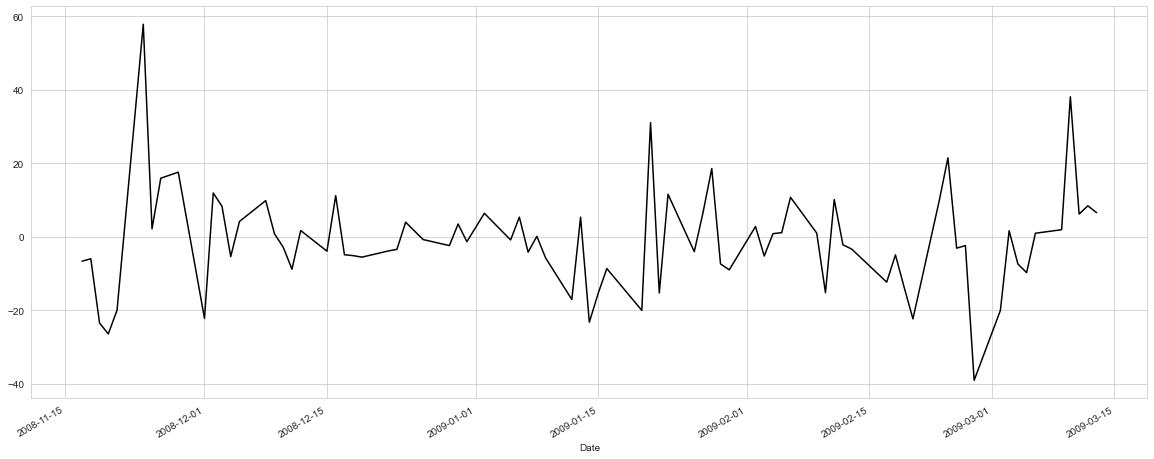

In [27]:
temp=returns['2008-11-15':'2009-03-15']
plt.subplots(figsize=(20,8))
temp["C's return"].plot(color="Black")

On February 27, 2009 the U.S. government has increased its stake in Citigroup, bringing it closer to nationalization.The deal gives the bank more capital, which ideally would lead to more lending. This deal inspired no confidence and Citi (C, Fortune 500) shares slumped 39% with investors worrying that the company will ultimately have to be taken over by the government overall, a move that would completely wipe out shareholders.

### h. Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?

In [28]:
# standard deviation of the returns ovwer the years
returns.std()

BAC's return    3.664743
C's return      3.867175
GS's return     2.538976
JPM's return    2.766738
MS's return     3.781923
WFC's return    3.023754
dtype: float64

Here we can see Citigroup is the Riskiest as it's St.Dev is highest

In [29]:
# standard deviation of the returns in the year of 2015
temp2015=returns['2015-01-01':'2015-12-31']
temp2015.std()

BAC's return    1.616257
C's return      1.528939
GS's return     1.404640
JPM's return    1.401684
MS's return     1.624912
WFC's return    1.259140
dtype: float64

Morgan Stanley is the Riskiest in the year of "2015" as it's St.Dev is highest

### i. Create a distplot using seaborn of the 2015 returns for Morgan Stanley

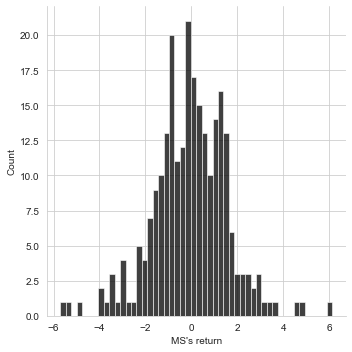

In [30]:
sns.displot(temp2015["MS's return"], color='Black',bins=50)

### j. Create a distplot using seaborn of the 2008 returns for CitiGroup

<AxesSubplot:xlabel="C's return", ylabel='Density'>

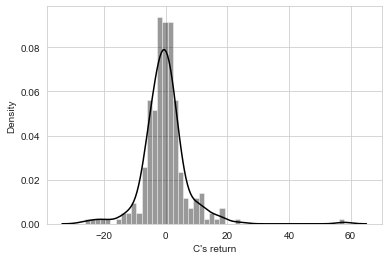

In [31]:
sns.distplot(returns.dropna()["C's return"]['2008-01-01':'2008-12-31'],color='Black',bins=50)

### 6. Visualisation in depth:
### a. Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use .xs to get a cross section of the data.

<AxesSubplot:xlabel='Date'>

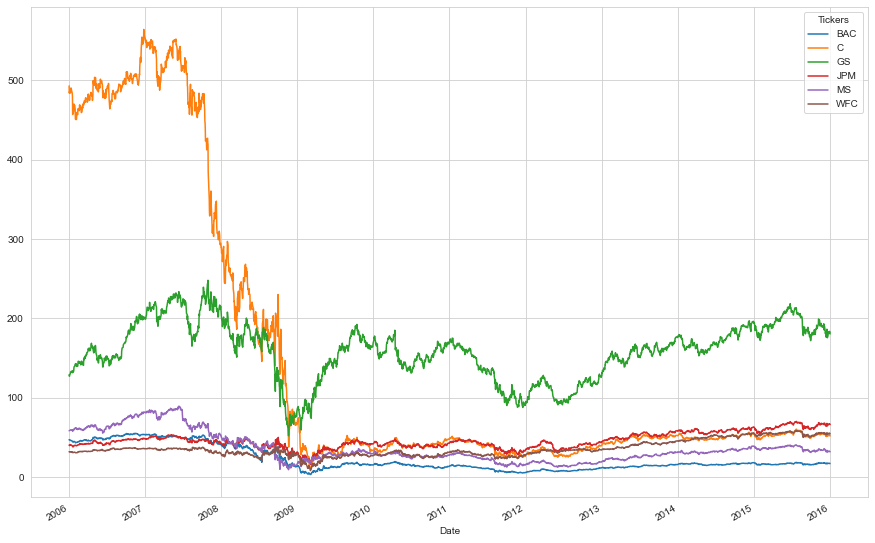

In [32]:
stocks.xs('Close', level='Stock prices', axis = 1).plot(figsize=(15,10))

### b. Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008

<AxesSubplot:xlabel='Date'>

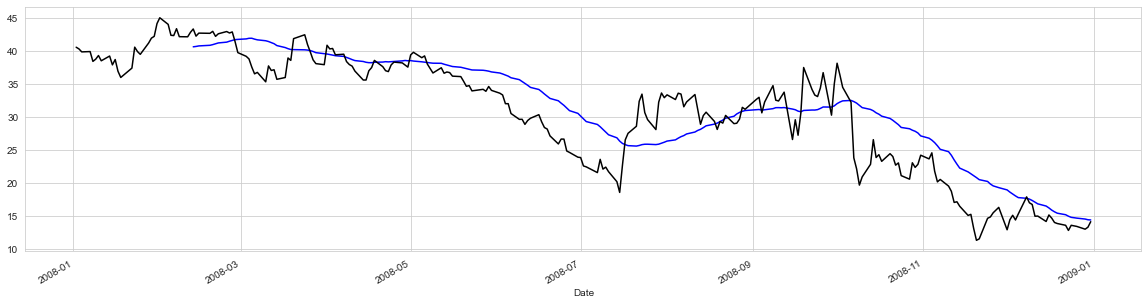

In [33]:
Rolling_ret= stocks.xs(key='Close',axis=1,level='Stock prices')['2008-01-01':'2008-12-31']['BAC'].rolling(30).mean()
Rolling_ret.plot(figsize=(20,5),color='Blue')
stocks.xs(key='Close',axis=1,level='Stock prices')['2008-01-01':'2008-12-31']['BAC'].plot(label='BAC Close', figsize=(20,5),color='Black')

### c. Create a heatmap of the correlation between the stocks Close Price

<AxesSubplot:xlabel='Tickers', ylabel='Tickers'>

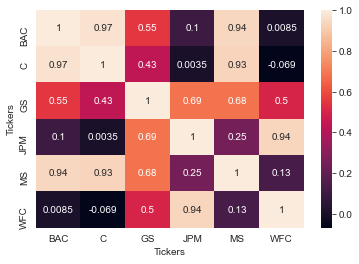

In [34]:
sns.heatmap(stocks.xs(key='Close',axis=1,level='Stock prices').corr(),annot=True)

### d. Use seaborn's clustermap to cluster the correlations together

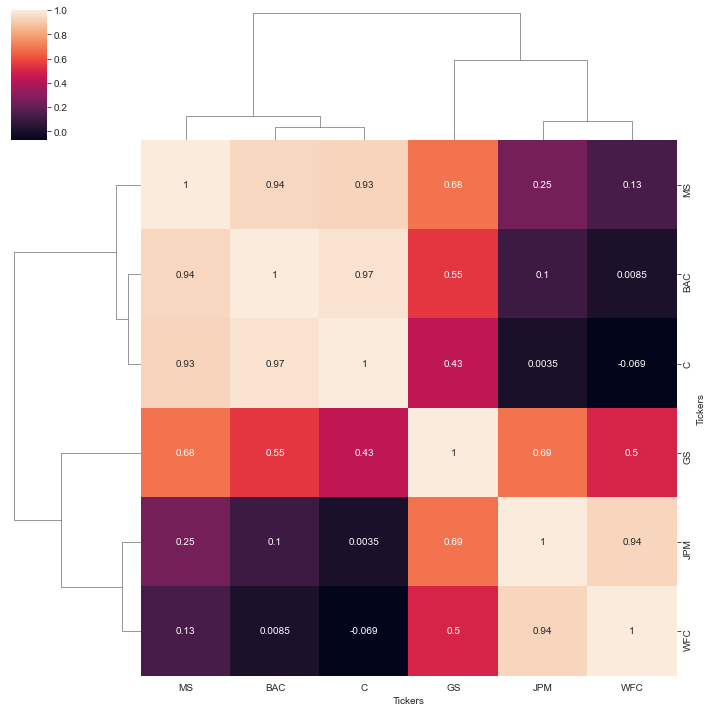

In [35]:
sns.clustermap(stocks.xs(key='Close',axis=1,level='Stock prices').corr(),annot=True)